In [2]:
import numpy as np
import math
import pandas as pd
import sklearn

In [3]:
roww = pd.read_csv('officer_infractions.csv')
clustp1 = roww[['Unique Id','Rank', 'Command']]
clustp2 = roww.iloc[:,4:]
clustp2

,FADO Type_Abuse of Authority,FADO Type_Discourtesy,FADO Type_Force,FADO Type_Offensive Language,Allegation_Abuse of Authority,Allegation_Action,Allegation_Animal,Allegation_Arrest/D. A. T.,Allegation_Arrest/Onlooker,Allegation_Beat,...,Allegation_Threat re: removal to hospital,Allegation_Threat to Property,Allegation_Threat to damage/seize property,Allegation_Threat to notify ACS,Allegation_Vehicle,Allegation_Vehicle Searched,Allegation_Vehicle search,Allegation_Vehicle stop,Allegation_White,Allegation_Word
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1,5,2,0,0,1,0,0,1,...,0,0,0,0,0,2,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,5,3,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48254,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
48255,5,2,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48256,1,1,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48257,2,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(clustp2)
pcaa = pca.transform(clustp2)
pcaa

array([[-3.11426897,  0.62941636, -0.19810264, -0.42635221],
       [ 1.85695674,  2.15002335,  0.0213305 , -1.59135177],
       [-0.69328241, -2.74102609,  0.19353004, -1.16932979],
       ...,
       [-1.45887681,  1.0226492 ,  0.47950962, -0.44268257],
       [-0.77075412, -0.03716262, -1.53515598, -0.03387688],
       [-3.3803514 ,  0.06500429,  0.83597995,  0.30956582]])

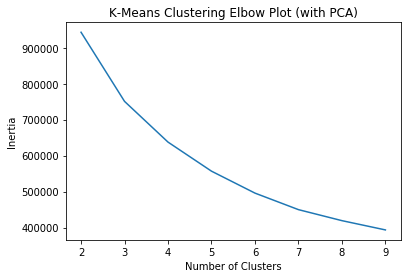

In [109]:
from sklearn.cluster import KMeans
inert = list()
for x in range(2,10):
    kmeans = KMeans(n_clusters=x).fit(pcaa)
    inert.append(kmeans.inertia_)
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot([2, 3, 4, 5, 6, 7, 8, 9],inert)
#plt.axis([2, 3, 4, 5, 6, 7, 8, 9])
plt.ylabel('Inertia')
plt.xlabel('Number of Clusters')
plt.title('K-Means Clustering Elbow Plot (with PCA)')
plt.show()

In [41]:
pcak = KMeans(n_clusters=4).fit(clustp2)
clustp1['pcakm'] = pcak.labels_
clustp1

C:\Users\darin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unique Id,Rank,Command,cluster,birch,pcakm
0,43921,POM,H BKLYN,0,0,1
1,52580,LT,MOUNTED,2,0,3
2,25775,POM,107 PCT,0,0,1
3,72558,POM,SRG 1,2,2,3
4,41738,DTS,ESS 07,0,0,1
...,...,...,...,...,...,...
48254,55941,SGT,NARCBQN,0,0,1
48255,77969,SGT,TB DT32,2,0,3
48256,63957,LT,POL ACD,0,0,1
48257,462,SGT,005 DET,0,0,1


In [106]:
clustp1

,Unique Id,Rank,Command,cluster,birch,pcakm,pcab
0,43921,POM,H BKLYN,0,0,1,0
1,52580,LT,MOUNTED,2,0,3,0
2,25775,POM,107 PCT,0,0,1,0
3,72558,POM,SRG 1,2,2,3,2
4,41738,DTS,ESS 07,0,0,1,0
...,...,...,...,...,...,...,...
48254,55941,SGT,NARCBQN,0,0,1,0
48255,77969,SGT,TB DT32,2,0,3,0
48256,63957,LT,POL ACD,0,0,1,0
48257,462,SGT,005 DET,0,0,1,0


In [42]:
clustp1['pcakm'].value_counts()/48259

1    0.768230
3    0.193415
2    0.031393
0    0.006962
Name: pcakm, dtype: float64

In [43]:
clustp1

,Unique Id,Rank,Command,cluster,birch,pcakm
0,43921,POM,H BKLYN,0,0,1
1,52580,LT,MOUNTED,2,0,3
2,25775,POM,107 PCT,0,0,1
3,72558,POM,SRG 1,2,2,3
4,41738,DTS,ESS 07,0,0,1
...,...,...,...,...,...,...
48254,55941,SGT,NARCBQN,0,0,1
48255,77969,SGT,TB DT32,2,0,3
48256,63957,LT,POL ACD,0,0,1
48257,462,SGT,005 DET,0,0,1


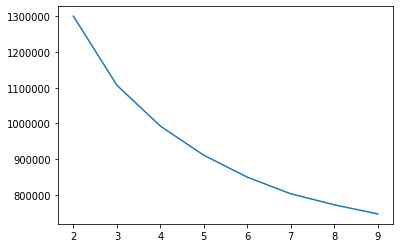

In [4]:
from sklearn.cluster import KMeans
inert = list()
for x in range(2,10):
    kmeans = KMeans(n_clusters=x).fit(clustp2)
    inert.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot([2, 3, 4, 5, 6, 7, 8, 9],inert)
#plt.axis([2, 3, 4, 5, 6, 7, 8, 9])
plt.show()

In [32]:
from sklearn.cluster import Birch
brc = Birch(n_clusters=4).fit(clustp2)
brc.labels_



array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
###BIRCH clustering
from sklearn.cluster import Birch
brc2 = Birch(n_clusters=4).fit(pcaa)
brc2.labels_

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [45]:
clustp1['pcab'] = brc.labels_
clustp1

C:\Users\darin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unique Id,Rank,Command,cluster,birch,pcakm,pcab
0,43921,POM,H BKLYN,0,0,1,0
1,52580,LT,MOUNTED,2,0,3,0
2,25775,POM,107 PCT,0,0,1,0
3,72558,POM,SRG 1,2,2,3,2
4,41738,DTS,ESS 07,0,0,1,0
...,...,...,...,...,...,...,...
48254,55941,SGT,NARCBQN,0,0,1,0
48255,77969,SGT,TB DT32,2,0,3,0
48256,63957,LT,POL ACD,0,0,1,0
48257,462,SGT,005 DET,0,0,1,0


In [35]:
clustp1['birch'] = brc.labels_
clustp1

C:\Users\darin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unique Id,Rank,Command,cluster,birch
0,43921,POM,H BKLYN,0,0
1,52580,LT,MOUNTED,2,0
2,25775,POM,107 PCT,0,0
3,72558,POM,SRG 1,2,2
4,41738,DTS,ESS 07,0,0
...,...,...,...,...,...
48254,55941,SGT,NARCBQN,0,0
48255,77969,SGT,TB DT32,2,0
48256,63957,LT,POL ACD,0,0
48257,462,SGT,005 DET,0,0


In [37]:
clustp1['birch'].value_counts()/48259

0    0.914213
2    0.073789
3    0.006859
1    0.005139
Name: birch, dtype: float64

In [5]:
kmeans = KMeans(n_clusters=4).fit(clustp2)
clustp1['cluster'] = kmeans.labels_

C:\Users\darin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
clustp1

,Unique Id,Rank,Command,cluster
0,43921,POM,H BKLYN,0
1,52580,LT,MOUNTED,2
2,25775,POM,107 PCT,0
3,72558,POM,SRG 1,2
4,41738,DTS,ESS 07,0
...,...,...,...,...
48254,55941,SGT,NARCBQN,0
48255,77969,SGT,TB DT32,2
48256,63957,LT,POL ACD,0
48257,462,SGT,005 DET,0


In [7]:
clustp1['cluster'].value_counts()

0    37078
2     9330
3     1515
1      336
Name: cluster, dtype: int64

In [11]:
one = clustp1[clustp1['cluster'] == 1]
two = clustp1[clustp1['cluster'] == 2]
three = clustp1[clustp1['cluster'] == 3]
zero = clustp1[clustp1['cluster'] == 0]

In [9]:
two

,Unique Id,Rank,Command,cluster
1,52580,LT,MOUNTED,2
3,72558,POM,SRG 1,2
10,47940,DT3,INT CIS,2
11,8330,DT2,043 DET,2
16,22534,POM,100 PCT,2
...,...,...,...,...
48232,56453,SGT,ND NMI,2
48234,44547,POM,H MAN,2
48251,13893,LT,061 PCT,2
48253,56498,SGT,ND Q/NI,2


In [10]:
two['Rank'].value_counts()

POM    3201
DT3    1739
SGT    1645
LT      670
DT2     513
DTS     303
POF     272
DT1     255
SDS     192
CPT     123
LCD     104
SSA     101
DI       60
INS      53
LSA      45
DC       33
AC        8
PSA       5
COD       2
CD        2
COP       1
COH       1
CSO       1
COI       1
Name: Rank, dtype: int64

In [12]:
one['Rank'].value_counts()

POM    116
DT3     67
SGT     59
LT      23
DT2     20
DTS     13
DT1      9
SDS      8
POF      5
DI       5
LCD      3
CPT      2
DC       2
INS      2
SSA      1
LSA      1
Name: Rank, dtype: int64

In [13]:
three['Rank'].value_counts()

POM    383
DT3    330
SGT    294
LT     136
DT2     75
SDS     69
DTS     60
DT1     32
CPT     31
LCD     28
SSA     21
POF     18
DI      12
LSA     10
INS      9
DC       3
AC       3
CCC      1
Name: Rank, dtype: int64

In [14]:
zero['Rank'].value_counts()

POM    16428
SGT     5024
DT3     4725
POF     3233
LT      2113
DT2     1597
DTS      989
DT1      716
CPT      529
SDS      415
SSA      294
LCD      242
DI       210
LSA      188
INS      165
DC        92
PSA       45
AC        36
COP        5
CPB        4
COD        3
CCA        3
CTB        3
COT        3
CD         3
COB        1
CCP        1
CSO        1
COC        1
CSI        1
COH        1
CMS        1
CMA        1
CTR        1
CCT        1
CSS        1
CBN        1
CIA        1
Name: Rank, dtype: int64

In [15]:
zero['Command'].value_counts()

WARRSEC    611
I.A.B.     573
INT CIS    326
120 PCT    324
075 PCT    301
          ... 
79 PCT       1
DBQ Z17      1
TR/BKTF      1
G&B DIV      1
CON ADM      1
Name: Command, Length: 687, dtype: int64

In [16]:
one['Command'].value_counts()

JT T/F     7
072 PCT    6
NARCBQN    6
PROPCLK    5
INT OAS    5
          ..
DPT INV    1
BK SVS     1
075 PCT    1
QNS CT     1
017 PCT    1
Name: Command, Length: 201, dtype: int64

In [17]:
two['Command'].value_counts()

WARRSEC    250
INT CIS    166
NARCBBX    146
I.A.B.     105
NARCBBN     94
          ... 
H VANDL      1
HWY 04       1
DC EEO       1
DA S/I       1
DC LABR      1
Name: Command, Length: 588, dtype: int64

In [18]:
three['Command'].value_counts()

WARRSEC    57
INT CIS    49
NARCBBX    31
NARCBBN    29
077 PCT    22
           ..
049 DET     1
ND SEQI     1
TB DT23     1
SP INV      1
DBMS        1
Name: Command, Length: 369, dtype: int64

In [20]:
warrsec = clustp1[clustp1['Command'] == 'WARRSEC']

In [21]:
warrsec

,Unique Id,Rank,Command,cluster
154,80137,DT2,WARRSEC,0
192,80136,DT3,WARRSEC,0
232,80138,DT3,WARRSEC,0
356,80139,POM,WARRSEC,0
476,80140,SGT,WARRSEC,0
...,...,...,...,...
48034,81253,DT3,WARRSEC,0
48076,81254,DT3,WARRSEC,0
48125,81255,DT3,WARRSEC,0
48228,81256,DT3,WARRSEC,2


In [24]:
warrsec['cluster'].value_counts()/920

0    0.664130
2    0.271739
3    0.061957
1    0.002174
Name: cluster, dtype: float64

In [26]:
clustp1['cluster'].value_counts()/48259

0    0.768313
2    0.193332
3    0.031393
1    0.006962
Name: cluster, dtype: float64

In [29]:
pom = clustp1[clustp1['Rank'] == 'POM']
pom['cluster'].value_counts()/len(pom)

0    0.816176
2    0.159032
3    0.019028
1    0.005763
Name: cluster, dtype: float64

0    0.816176
2    0.159032
3    0.019028
1    0.005763
Name: cluster, dtype: float64

In [46]:
clustp1

,Unique Id,Rank,Command,cluster,birch,pcakm,pcab
0,43921,POM,H BKLYN,0,0,1,0
1,52580,LT,MOUNTED,2,0,3,0
2,25775,POM,107 PCT,0,0,1,0
3,72558,POM,SRG 1,2,2,3,2
4,41738,DTS,ESS 07,0,0,1,0
...,...,...,...,...,...,...,...
48254,55941,SGT,NARCBQN,0,0,1,0
48255,77969,SGT,TB DT32,2,0,3,0
48256,63957,LT,POL ACD,0,0,1,0
48257,462,SGT,005 DET,0,0,1,0


In [49]:
clustp1['Command'].value_counts().head(7)

WARRSEC    920
I.A.B.     690
INT CIS    544
075 PCT    414
120 PCT    412
NARCBBX    384
044 PCT    380
Name: Command, dtype: int64

In [58]:
ranks = ['POM','SGT','DT3','POF','LT','DT2','DTS']
commands = ['WARRSEC','I.A.B.','INT CIS','075 PCT','120 PCT','NARCBBX','044 PCT']



for x in ranks:
    print(clustp1[clustp1['Rank'] == x]['cluster'].value_counts()/len(clustp1[clustp1['Rank'] == x]))

for x in commands:
    print(clustp1[clustp1['Command'] == x]['cluster'].value_counts()/len(clustp1[clustp1['Command'] == x]))
    
    
print(clustp1[clustp1['Command'] == x]['cluster'].value_counts()/len(clustp1[clustp1['Command'] == x]))

0    0.816176
2    0.159032
3    0.019028
1    0.005763
Name: cluster, dtype: float64
0    0.715466
2    0.234264
3    0.041868
1    0.008402
Name: cluster, dtype: float64
0    0.688675
2    0.253462
3    0.048098
1    0.009765
Name: cluster, dtype: float64
0    0.916383
2    0.077098
3    0.005102
1    0.001417
Name: cluster, dtype: float64
0    0.718219
2    0.227736
3    0.046227
1    0.007818
Name: cluster, dtype: float64
0    0.724263
2    0.232653
3    0.034014
1    0.009070
Name: cluster, dtype: float64
0    0.724542
2    0.221978
3    0.043956
1    0.009524
Name: cluster, dtype: float64
0    0.664130
2    0.271739
3    0.061957
1    0.002174
Name: cluster, dtype: float64
0    0.830435
2    0.152174
3    0.014493
1    0.002899
Name: cluster, dtype: float64
0    0.599265
2    0.305147
3    0.090074
1    0.005515
Name: cluster, dtype: float64
0    0.727053
2    0.219807
3    0.050725
1    0.002415
Name: cluster, dtype: float64
0    0.786408
2    0.194175
3    0.019417
Name: cluste

In [70]:
x = 'WARRSEC'
print(clustp1[clustp1['Command'] == x]['cluster'].value_counts()/len(clustp1[clustp1['Command'] == x]))

0    0.664130
2    0.271739
3    0.061957
1    0.002174
Name: cluster, dtype: float64


In [91]:
##Creates an array of differences in conditional distributions

ranks = ['POM','SGT','DT3','POF','LT','DT2','DTS']
commands = ['WARRSEC','I.A.B.','INT CIS','075 PCT','120 PCT','NARCBBX','044 PCT']



x = 'WARRSEC'
y = 'I.A.B.'

orig = clustp1['cluster'].value_counts()/len(clustp1['cluster'])
print(orig)

base = orig
for x in commands:
    base = np.vstack((base,clustp1[clustp1['Command'] == x]['cluster'].value_counts()/len(clustp1[clustp1['Command'] == x]) - orig))
 
for y in ranks:
    base = np.vstack((base,clustp1[clustp1['Rank'] == y]['cluster'].value_counts()/len(clustp1[clustp1['Rank'] == y]) - orig))

base

0    0.768313
2    0.193332
3    0.031393
1    0.006962
Name: cluster, dtype: float64


array([[ 0.76831265,  0.19333181,  0.03139311,  0.00696243],
       [-0.10418221,  0.07840732,  0.03056341, -0.00478852],
       [ 0.06212214, -0.0411579 , -0.01690035, -0.00406388],
       [-0.16904794,  0.11181525,  0.05868042, -0.00144773],
       [-0.04125951,  0.02647495,  0.01933153, -0.00454697],
       [ 0.01809512,         nan,  0.00084294, -0.01197563],
       [-0.23445848,  0.18687652,  0.04933606, -0.0017541 ],
       [-0.03936528,  0.01982608,  0.01334373,  0.00619546],
       [ 0.04786382, -0.03429962, -0.01236489, -0.00119932],
       [-0.05284697,  0.04093193,  0.01047531,  0.00143973],
       [-0.07963753,  0.06012978,  0.01670484,  0.00280291],
       [ 0.14807057, -0.11623431, -0.02629107, -0.0055452 ],
       [-0.05009375,  0.03440442,  0.01483395,  0.00085538],
       [-0.04404961,  0.03932125,  0.0026205 ,  0.00210786],
       [-0.04377052,  0.02864621,  0.01256294,  0.00256138]])

In [105]:
base[5,1] = -0.193332
base = abs(base)
diff = pd.DataFrame(base[1:,:])
diffsums = diff.sum(axis = 1)
diffsums

0     0.217941
1     0.124244
2     0.340991
3     0.091613
4     0.224246
5     0.472425
6     0.078731
7     0.095728
8     0.105694
9     0.159275
10    0.296141
11    0.100187
12    0.088099
13    0.087541
dtype: float64

In [110]:
base

array([[0.76831265, 0.19333181, 0.03139311, 0.00696243],
       [0.10418221, 0.07840732, 0.03056341, 0.00478852],
       [0.06212214, 0.0411579 , 0.01690035, 0.00406388],
       [0.16904794, 0.11181525, 0.05868042, 0.00144773],
       [0.04125951, 0.02647495, 0.01933153, 0.00454697],
       [0.01809512, 0.193332  , 0.00084294, 0.01197563],
       [0.23445848, 0.18687652, 0.04933606, 0.0017541 ],
       [0.03936528, 0.01982608, 0.01334373, 0.00619546],
       [0.04786382, 0.03429962, 0.01236489, 0.00119932],
       [0.05284697, 0.04093193, 0.01047531, 0.00143973],
       [0.07963753, 0.06012978, 0.01670484, 0.00280291],
       [0.14807057, 0.11623431, 0.02629107, 0.0055452 ],
       [0.05009375, 0.03440442, 0.01483395, 0.00085538],
       [0.04404961, 0.03932125, 0.0026205 , 0.00210786],
       [0.04377052, 0.02864621, 0.01256294, 0.00256138]])

In [98]:
#clustp1[clustp1['Command'] == '120 PCT']['cluster'].value_counts()/len(clustp1[clustp1['Command'] == '120 PCT']) - orig

0    inf
1    NaN
2    inf
3    inf
Name: cluster, dtype: float64

In [100]:
#clustp1[clustp1['Command'] == '120 PCT']['cluster'].value_counts()

0    324
2     80
3      8
Name: cluster, dtype: int64